In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
print("LOADING CIFAR 10 DATASET")
((trainX, trainY), (testX, testY)) = cifar10.load_data()


LOADING CIFAR 10 DATASET
170498071/170498071 [==============================] - 11s 0us/step


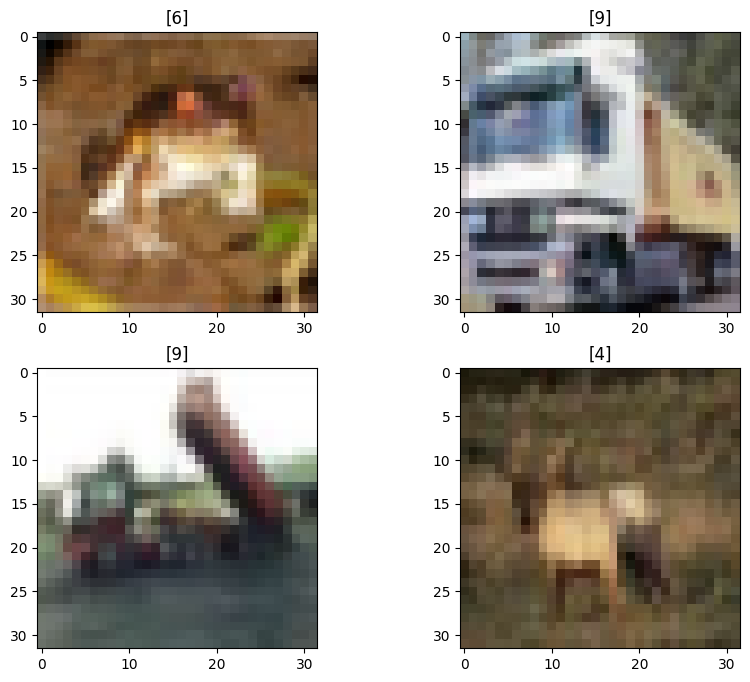

In [ ]:
#Visualizing Training Data
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(trainX[i])
  plt.title(trainY[i])

In [ ]:
#Normalising and Reshaping the data
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3676682 (14.03 MB)
Trainable params: 3676682 (14.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])

In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.8351 - accuracy: 0.3456 - val_loss: 1.6860 - val_accuracy: 0.4053
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6477 - accuracy: 0.4133 - val_loss: 1.6555 - val_accuracy: 0.4079
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5685 - accuracy: 0.4464 - val_loss: 1.5436 - val_accuracy: 0.4569
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5067 - accuracy: 0.4676 - val_loss: 1.5276 - val_accuracy: 0.4535
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4625 - accuracy: 0.4835 - val_loss: 1.4608 - val_accuracy: 0.4830
Epoch 6/10
1563/1563 [==============================] - 41s 27ms/step - loss: 1.4203 - accuracy: 0.4964 - val_loss: 1.4429 - val_accuracy: 0.4877
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3848 - accuracy: 0.5109 - val_loss: 1.4618 -

In [ ]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))